# The NCAA's Next Super Star


![alt text][all_star_game_2016]
## Abstract
All NCAA players have their potential to be a NBA superstar. No matter it started with a [terrible debut year (eg. Lebron James)](http://www.thesportster.com/basketball/15-nba-superstars-who-were-terrible-in-their-debut-season/) or rewarding one like being selected to the [all-star game (eg. Tim Duncan)](http://www.nba-allstar.com/players/lists/all-star-game-rookies.htm), it is believed that there exists some evidences in their college years foretelling their future success.


In this project, we are interested in discovering the intrinsic relationship between a player’s NCAA statistics and the presence in the NBA all-star game from a scout’s perspective. To discover this relationship, we use NCAA historical statistics from 2001 to 2016, mainly the information of average scoring/assist/steal/rebound/block capability.  Several machine learning algorithms have been adopted on modeling this relationship. 


Given players’ historical NCAA statistics, we would like to discover whether he will be a successful NBA player, defined by the occurrence in NBA all star game at least once. 


This project aims to predict the NBA suplayer with the aid of the following data sources that reflects a player's performance, annual ratings on video games, and exposure on social media and newspaper.


## Objective
Judging from indicators of each player’s NCAA statistics, we would like to predict the likelihood of a player becoming a NBA superstar in his future. 


[all_star_game_2016]: http://i.cdn.turner.com/nba/nba/dam/assets/160121164737-all-star-starters-graphic-1280-012116.1200x672.jpg "All Star Game 2016"


In [29]:
from urllib import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [30]:
Data_T = pd.read_csv("ncaa_allstar_data_T.csv")
Data_F = pd.read_csv("ncaa_allstar_data_F.csv")
y_T = Data_T['allstar']
y_F = Data_F['allstar']
X_T = Data_T.drop(['PLAYER', 'TEAM', 'allstar'], axis = 1)
X_F = Data_F.drop(['PLAYER', 'TEAM', 'allstar'], axis = 1)

# Split data

In [31]:
def splitPermuteByNumber(X, y, cutoff):
    t_ind = X.index
    t_ind_perm = np.random.permutation(len(t_ind))
    perm = t_ind[t_ind_perm]

    ind = t_ind[t_ind_perm]
    t_ind_te = perm[:cutoff]
    t_ind_tr = perm[cutoff:]
    return X.loc[t_ind_te], X.loc[t_ind_tr], y.loc[t_ind_te], y.loc[t_ind_tr]

def splitPermuteByPercent(X, y, percent):
    cutoff = int(len(X) * percent)
    return splitPermuteByNumber(X, cutoff)

In [32]:
Xt_te, Xt_tr, yt_te, yt_tr = splitPermuteByNumber(X_T, y_T, 20)
Xf_te, Xf_tr, yf_te, yf_tr = splitPermuteByNumber(X_F, y_F, 20)

X_traning_list = ([Xt_tr] * 1 + [Xf_tr])
y_traning_list = ([yt_tr] * 1 + [yf_tr])

X_te = pd.concat([Xt_te, Xf_te])
X_tr = pd.concat(X_traning_list)
y_te = pd.concat([yt_te, yf_te])
y_tr = pd.concat(y_traning_list)

In [33]:
print X_tr.shape
print X_te.shape

# print Xt_tr.shape
# print Xt_te.shape
# print Xf_tr.shape
# print Xf_te.shape

(3730, 23)
(40, 23)


# Tools

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

def showROCCurve(y_te, y_pred):
#     y_pred[y_pred >= threshold] = 1
#     y_pred[y_pred < threshold] = 0
#     print (y_pred == y_te).mean()
    
    precision, recall, threshold = precision_recall_curve(y_te, y_pred)
    average_precision = average_precision_score(y_te, y_pred)
    
    for k, v, r in zip(threshold, precision, recall):
        print "t = %.2f\t p = %.2f\t r = %.2f" % (k, v, r)
    
    fpr, tpr, _ = roc_curve(y_te, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # plt.clf() will just clear the figure - you can still paint another plot onto it.
    lw = 2
    plt.clf()
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)    
    plt.plot(recall, precision, lw=lw, color='navy', label='Precision-Recall curve (AUC = %0.2f)' % average_precision)
    plt.xlabel('False Positive Rate(ROC)/Recall(PRC)')
    plt.ylabel('True Positive Rate(ROC)/Precision(PRC)')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc="lower right")
    plt.show()

# Linear regression

t = -0.00	 p = 0.57	 r = 1.00
t = -0.00	 p = 0.56	 r = 0.95
t = -0.00	 p = 0.55	 r = 0.90
t = -0.00	 p = 0.56	 r = 0.90
t = -0.00	 p = 0.55	 r = 0.85
t = 0.00	 p = 0.57	 r = 0.85
t = 0.00	 p = 0.55	 r = 0.80
t = 0.00	 p = 0.54	 r = 0.75
t = 0.00	 p = 0.56	 r = 0.75
t = 0.01	 p = 0.54	 r = 0.70
t = 0.01	 p = 0.56	 r = 0.70
t = 0.01	 p = 0.54	 r = 0.65
t = 0.01	 p = 0.57	 r = 0.65
t = 0.01	 p = 0.59	 r = 0.65
t = 0.01	 p = 0.62	 r = 0.65
t = 0.01	 p = 0.65	 r = 0.65
t = 0.01	 p = 0.68	 r = 0.65
t = 0.01	 p = 0.72	 r = 0.65
t = 0.01	 p = 0.71	 r = 0.60
t = 0.01	 p = 0.75	 r = 0.60
t = 0.02	 p = 0.73	 r = 0.55
t = 0.02	 p = 0.79	 r = 0.55
t = 0.02	 p = 0.77	 r = 0.50
t = 0.02	 p = 0.75	 r = 0.45
t = 0.02	 p = 0.82	 r = 0.45
t = 0.03	 p = 0.80	 r = 0.40
t = 0.03	 p = 0.78	 r = 0.35
t = 0.03	 p = 0.75	 r = 0.30
t = 0.03	 p = 0.86	 r = 0.30
t = 0.03	 p = 0.83	 r = 0.25
t = 0.03	 p = 0.80	 r = 0.20
t = 0.05	 p = 0.75	 r = 0.15
t = 0.05	 p = 0.67	 r = 0.10
t = 0.06	 p = 0.50	 r = 0.05
t = 0.06	

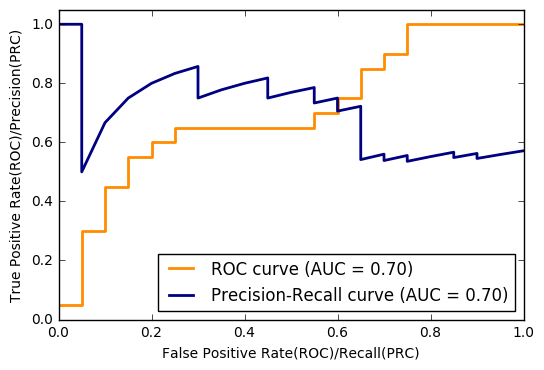

In [35]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_tr, y_tr)
y_pred = regr.predict(X_te)
showROCCurve(y_te, y_pred)


# Linear Discriminant Analysis

t = 0.00	 p = 0.50	 r = 1.00
t = 1.00	 p = 0.50	 r = 0.05


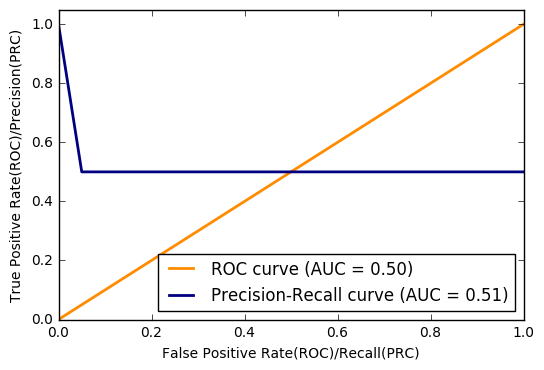

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_tr, y_tr).predict(X_te)
showROCCurve(y_te, y_pred)

# QuadraticDiscriminantAnalysis

t = 0.00	 p = 0.50	 r = 1.00


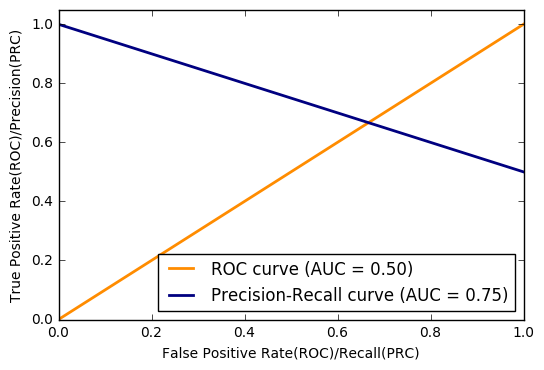

In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariances=True)
y_pred = qda.fit(X_tr, y_tr).predict(X_te)
showROCCurve(y_te, y_pred)

# Imbalanced-learn Pipeline


1.11.2


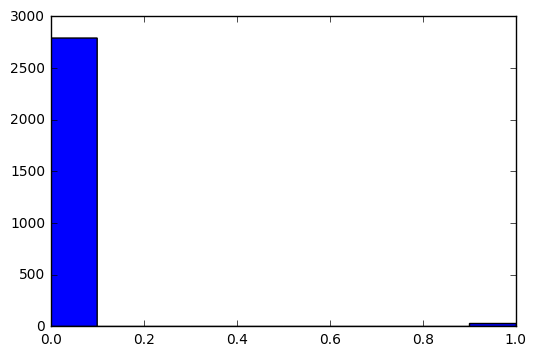

(2827, 23) (943, 23) (2827,) (943,)
             precision    recall  f1-score   support

      False       0.99      1.00      0.99       933
       True       0.00      0.00      0.00        10

avg / total       0.98      0.99      0.98       943

t = 0.00	 p = 0.01	 r = 1.00
t = 1.00	 p = 0.00	 r = 0.00


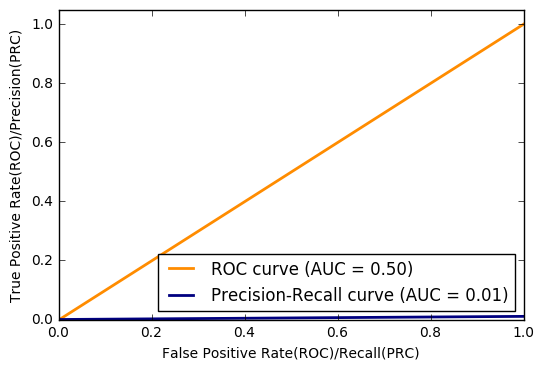

In [39]:
print np.version.version
from sklearn.cross_validation import train_test_split as tts
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)


# Create the samplers
enn = EditedNearestNeighbours()
renn = RepeatedEditedNearestNeighbours()
pca = PCA(n_components=23)

# Create teh classifier
X = pd.concat([X_tr, X_te])
y = pd.concat([y_tr, y_te])
knn = KNN(2)
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

plt.hist(y_train)
plt.show()


print X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Add one transformers and two samplers in the pipeline object
pipeline = make_pipeline(pca, enn, renn, knn)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
showROCCurve(y_test, y_pred)